# Vorbereitung
Import und einlesen der Daten, Überprüfen der Form (Spalten, Zeilen) der Datensätze

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# the scaler - for min-max scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
X_train = pd.read_csv("Xtrain_tvshows_cat.csv")
X_test = pd.read_csv("Xtest_tvshows_cat.csv")

print("Shape of X Train: {}".format(X_train.shape))
print("Shape of X Test: {}".format(X_test.shape))
#print("Shape of y Train: {}".format(ytrain.shape))
#print("Shape of y Test: {}".format(ytest.shape))

Shape of X Train: (4294, 7)
Shape of X Test: (1074, 7)


In [3]:
X_train.head()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,8,6.2,38.0,0,0,1,0
1,35,7.0,73.0,0,1,1,0
2,7,7.2,71.0,1,0,0,0
3,6,6.8,10.0,0,0,1,0
4,2,6.0,52.0,0,1,0,0


In [4]:
X_train_sel = X_train[['Year','IMDb','Rotten_Tomatoes']]
X_test_sel = X_test[['Year','IMDb','Rotten_Tomatoes']]

print("Shape ausgelesenes Format Train: {}".format(X_train_sel.shape))
print("Shape ausgelesenes Format Test: {}".format(X_test_sel.shape))

Shape ausgelesenes Format Train: (4294, 3)
Shape ausgelesenes Format Test: (1074, 3)


# Scaling der Daten
-> Die Daten der einzelnen Spalten müssen so skaliert werden, dass sich alle Werte zwischen 0 und 1 befinden und sie somit korrekt interpretierbar und untereinander vergleichbar sind.

-> Dies ist erforderlich, damit anschliessend mit Algorithmen gearbeitet und Modelle erstellt werden können.

In [5]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_sel)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

Erstellen neuer Files für die skalierten Daten, um die Originaldaten zu erhalten:


In [6]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_sel.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_sel.columns)

Erstellen von zwei Subplots, die die Daten vor- und nach der Skalierung darstellen. Anhand dieser kann beurteilt werden, ob die Skalierung sinnvoll war und wie sich die Verteilung der Daten im Vergleich zu vor der Skalierung verändert hat.

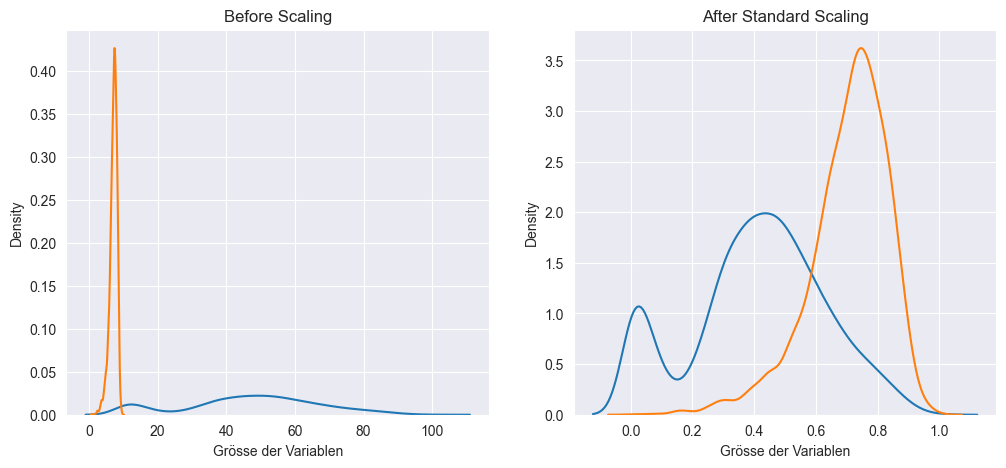

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_sel['Rotten_Tomatoes'], ax=ax1)
sns.kdeplot(X_train_sel['IMDb'], ax=ax1)
ax1.set_xlabel("Grösse der Variablen")

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Rotten_Tomatoes'], ax=ax2)
sns.kdeplot(X_train_scaled['IMDb'], ax=ax2)
ax2.set_xlabel("Grösse der Variablen")
plt.show()

Form der Datensätze erneut überprüfen:


In [8]:
X_train.drop(['Year','IMDb','Rotten_Tomatoes'], axis = 1, inplace=True)
X_test.drop(['Year','IMDb','Rotten_Tomatoes'], axis =1, inplace = True)
print("Shape of prepared train data set: {}".format(X_train.shape))
print("Shape of prepared test data set: {}".format(X_test.shape))

Shape of prepared train data set: (4294, 4)
Shape of prepared test data set: (1074, 4)


In [9]:
X_train_prep_tot = pd.concat([X_train_scaled, X_train], axis = 1)
X_test_prep_tot = pd.concat([X_test_scaled, X_test], axis = 1)
print("Shape of prepared train data set: {}".format(X_train_prep_tot.shape))
print("Shape of prepared test data set: {}".format(X_test_prep_tot.shape))

Shape of prepared train data set: (4294, 7)
Shape of prepared test data set: (1074, 7)


In [10]:
X_train_prep_tot.head()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,0.051282,0.600000,0.311111,0,0,1,0
1,0.282051,0.694118,0.700000,0,1,1,0
2,0.042735,0.717647,0.677778,1,0,0,0
3,0.034188,0.670588,0.000000,0,0,1,0
4,0.000000,0.576471,0.466667,0,1,0,0


In [11]:
X_train_prep_tot.to_csv("Xtrain_tvshows_scaled.csv",index=False)
X_test_prep_tot.to_csv("Xtest_tvshows_scaled.csv",index=False)